In [3]:
import requests # apis
from datetime import datetime
import re

import numpy as np
import pandas as pd

# from models.db import get_db_hook
# from models.models import BASE
# from models.models import DimCoin


In [4]:
# constants
URL = 'https://production.api.coindesk.com/v2/price/values/{coin}?start_date={start}&end_date={end}&ohlc=true'

AVAILABLE_COINS = [ # dim table for coins
    'BTC', 'ETH', 'XRP', 'BCH', 'ADA', 'XLM', 'NEO', 'LTC', 'EOS', 'XEM', 
    'IOTA', 'DASH', 'XMR', 'TRX', 'ICX', 'ETC', 'QTUM', 'BTG', 
    'VET', 'LSK', 'USDT', 'OMG', 'STEEM', 'ZEC', 'SC', 'BNB', 'XVG', 
    'SNT', 'ZRX', 'REP', 'KCS', 'WAVES', 'MKR', 'DCR', 'BAT', 'DGB', 'LRC', 'GAS', 
    'KNC', 'DENT', 'POWR', 'SYS', 'BNT', 'REQ', 'GNO', 'LINK', 'QSP', 'CVC', 'RLC', 'ENJ', 
    'STORJ', 'ANT', 'SNGLS', 'THETA', 'ZEN', 'MANA', 'MLN', 'DNT', 'MOON', 'AMP', 'GTC', 
    'NMR', 'STX', 'LEO', 'GMT', 'POLIS', 'DOT', 'DAI', 'XCN', 'UNI', 'ATOM', 'GRT', 'LUNA', 'DAR', 
    'SCRT', 'IMX', 'ARB', 'OCEAN', 'ZIL', 'TRAC', 'MDT', 'HOT', 'XTZ', 'FIL', 'BIT', 'GMX', 'ZBC', 
    'HIGH', 'OP', 'ERN', 'NANO', 'WBTC', 'HT', 'OKB', 'BSV', 'DOGE', 'USDC', 'OXT', 'ALGO', 'BAND', 'BTT', 'FET',
    'KAVA', 'USDP', 'PAXG', 'REN', 'AAVE', 'YFI', 'NU', 'MATIC', 'ICP', 'SOL', 'SUSHI', 'UMA', 'SNX', 'CRV', 'COMP', 'CELO', 
    'KSM', 'NKN', 'SHIB', 'SKL', 'SAND', 'UST', 'AVAX', 'IOTX', 'AXS', 'XYO', 'ANKR', 'CHZ', 'LPT', 'COTI', 'KEEP', 'GALA', 'CRO', 
    'ACHP', 'JASMY', 'SLP', 'APE', 'BUSD', 'CAKE', 'EGLD', 'ENS', 'FTM', 'FTT', 'HBAR', 'MBOX', 'MINA', 'MOVR', 'NEAR', 'NEXO', 'POLS', 'QNT', 
    'QUICK', 'RUNE', 'RVN', 'WAXP', 'WRX', 'XEC', 'CEL', 'ALPACA', 'AUDIO', 'AVA', 'CHR', 'CKB', 'CLV', 'FARM', 'FLOW', 'GLMR', 'IDEX', 'INJ', 
    'JOE', 'MIR', 'POLY', 'PYR', 'RARE', 'RAY', 'ROSE', 'SFP', 'SRM', 'STMX', 'SUN', 'SXP', 'VGX', 'WOO', 'YGG', 'LUNC', 'APT', 'MASK', 'DYDX',
    'CTSI', 'CVX', 'FORTH', 'LDO', 'METIS', 'RBN', 'SAMO', 'SPELL', '1INCH', 'ALCX', 'ALICE', 'API3', 'ARPA', 'ASTR', 'BADGER', 'BAL', 'BICO',
    'BOBA', 'BOND', 'BTRST', 'C98', 'CELR', 'DIA', 'ETHW', 'GAL', 'GHST', 'GLM', 'HFT', 'ILV', 'KP3R', 'LCX', 'LOKA', 'LQTY', 'MC', 'MPL', 'MXC',
    'OGN', 'PERP', 'PDA', 'POND', 'RAD', 'RARI', 'RLY', 'RNDR', 'RPL', 'STG', 'SYN', 'T', 'TLM', 'TRU', 'UNFI', 'AR', 'FXS', 'GUSD', 'KLAY', 'TUSD',
    'XDC', 'XRD', 'USDD', 'TON', 'TWT', 'HNT', 'OSMO', 'ATLAS', 'BFC', 'BLUR', 'BABYDOGE', 'CEEK', 'ELON', 'FLOKI', 'KISHU', 'LOOKS', 'ONE', 'RACA', 'REEF',
    'SAITAMA', 'WIN', 'AGLD', 'TOKE', 'GST', 'CSPR', 'GT', 'PEPE', 'BLZ', 'FLR', 'FIS', 'GNS', 'ID', 'AXL', 'WEMIX', 'VLX', 'HMT', 'DG', 'SWEAT', 'BONE', 
    'SANTOS', 'SUI', 'TVK', 'BONK', 'PIT', 'CORE', 'BRISE', 'KAS', 'AGIX', 'XEN', 'HAM', 'TAMA', 'KDA', 'CFX', 'VRA', 'BDX', 'RDNT', 'WLD', 'FB', 'PYUSD', 
    'SEI', 'TOMI', 'AKT', 'MAGIC', 'ALPHA', 'ALI', 'CQT', 'AERGO', 'GODS', 'ACA', 'LIT', 'QI', 'AURORA', 'XCH', 'STRK', 'MANTA', 
    'PYTH', 'EETH', 'TIA', 'ETHFI', 'WIF', 'ACS', 'AIOZ', 'BIGTIME', 'DYM', 'ELA', 'JTO', 'JUP', 'ONDO', 'ORCA', 'PRIME', 'TRB', 'ZETA', 'USDE'
]

In [46]:
# def load_json_file(path):
#     """Return a dictionary structured exactly [dumped] as the JSON file."""
#     import json
#     try:
#         with open(path, encoding='utf-8') as file:
#             loaded_dict = json.load(file)
#         return loaded_dict
#     except FileNotFoundError as e:
#         raise FileNotFoundError(f"Error: {e}. File not found at path: {path}")
#     except json.JSONDecodeError as e:
#         raise Exception(f"Error: {e}. Unable to decode JSON file at path: {path}")
#     except Exception as e:
#         raise Exception(f"Error: {e}. An unexpected error occurred while loading JSON file at path: {path}")


# config_file = "./configs/config.json"
# config = load_json_file(config_file)
# connection, factory = get_db_hook(
#     config=config.get('local', None),
#     base=BASE,
#     # logger=logger

# )

# factory.create_tables()

NameError: name 'BASE' is not defined

In [5]:
# functions and execution
# looking and reading and investigating 

# You are not for how-to-do items, but why-to-do items
# 60-70% of data-related work is about understanding the data and the goals/business use

# ------------------------- This data scraping using APIs
def uri_generator(coin: str, start: int, end: int): # make him send on day level
    if coin not in AVAILABLE_COINS:
        raise ValueError(f"The provided coin '{coin}' is not within the list of available coins: {AVAILABLE_COINS}")
        
    completion = 'T00:00'
    try:
        start = datetime.strptime(str(start), '%Y%m%d').strftime(f'%Y-%m-%d{completion}')
        end = datetime.strptime(str(end), '%Y%m%d').strftime(f'%Y-%m-%d{completion}')
    except Exception as e:
        raise e
    
    return URL.format(
        coin=coin,
        start=start,
        end=end
    )

def retrive_data(uri):
    print(uri)
    result = requests.get(uri)
    try:
        result.raise_for_status()
    except Exception as e:
        raise e

    return result.json()



In [16]:
uri = uri_generator('ETH', start=20220101, end=20230101)
data = retrive_data(uri)

# dimentional information  # fill inside the dim table
#   'iso': 'ETH',
#   'name': 'Ethereum',
#   'slug': 'ethereum',
#   'ingestionStart': '2015-08-09',
#   'interval': '1d',

# ohlc
df = pd.DataFrame(data['data']['entries'], columns=['epoch', 'open', 'high', 'low', 'close']) # Build table for coin data 
df # PK is the epoch for a single coin - hash - partitioning 20240405
# result.json()['data']['entries']

https://production.api.coindesk.com/v2/price/values/ETH?start_date=2022-01-01T00:00&end_date=2023-01-01T00:00&ohlc=true


,epoch,open,high,low,close
0,1641081599000,3677.080701,3778.071852,3677.009885,3762.302237
1,1641167999000,3767.346677,3854.502054,3723.137153,3831.290606
2,1641254399000,3831.704411,3852.754530,3683.203382,3756.384735
3,1641340799000,3765.503418,3885.046705,3716.038726,3819.067316
4,1641427199000,3785.128886,3847.573425,3417.595364,3528.714431
...,...,...,...,...,...
361,1672271999000,1211.126883,1214.833298,1182.640515,1185.679731
362,1672358399000,1188.781554,1205.655003,1186.472155,1198.238105
363,1672444799000,1200.218610,1201.559918,1184.875021,1197.952538
364,1672531199000,1199.324713,1208.100952,1193.301025,1198.178384


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   epoch   366 non-null    int64  
 1   open    366 non-null    float64
 2   high    366 non-null    float64
 3   low     366 non-null    float64
 4   close   366 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 14.4 KB


In [40]:
((df['close'] - df['open']).mean()) * df.shape[0]

-2132.9681820800965

<Axes: >

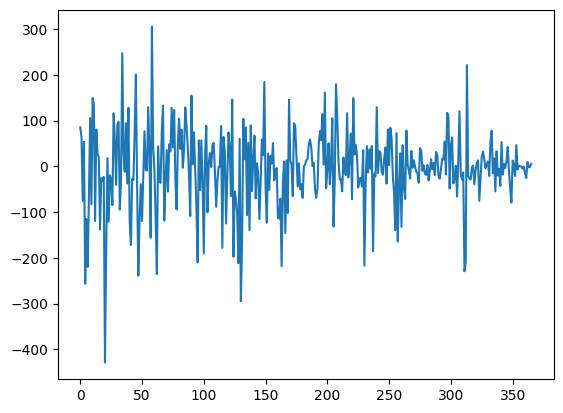

In [37]:
(df['close'] - df['open']).plot()

In [38]:
df['epoch'] = df['epoch'] // 1000
df['epoch'] = pd.to_datetime(df['epoch'], unit='s',)

<Axes: xlabel='epoch'>

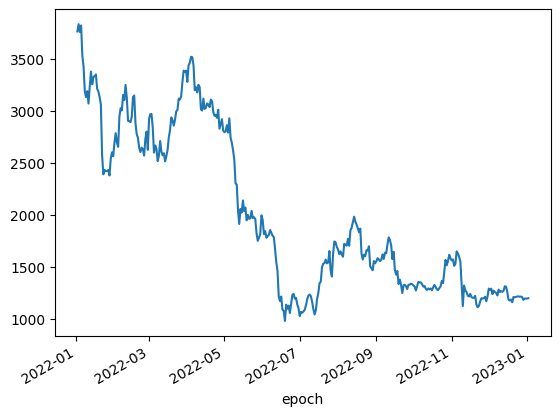

In [39]:
df.set_index('epoch')['close'].plot()

In [10]:
# df

In [11]:
# df.info()

In [12]:
# (df['close'] - df['open']).mean()

In [13]:
(df['close'] - df['open']).plot()

<Axes: xlabel='epoch'>

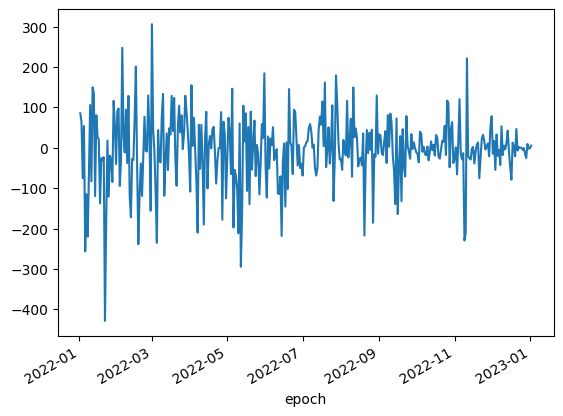

In [30]:
df = df.set_index('epoch')

(df['close'] - df['open']).plot()

In [14]:
# df['close'].plot()

In [15]:
# -5.82 *366

In [35]:
class CryptoData:
    def __init__(self, epoch,open,high,low,close):
        self.epoch = epoch
        self.open = open
        self.high = high
        self.low = low
        self.close = close

    def __str__(self):
        return f"This is my crypto day: {self.epoch}-{self.open}-{self.close}"


lst = []
for row in df.iterrows():
    lst.append(
        [row[0], CryptoData(*row[-1].values)]
    )



for i in lst[:5]:
    print(i[0], i[-1])

0 This is my crypto day: 1641081599000.0-3677.0807012771-3762.3022374309
1 This is my crypto day: 1641167999000.0-3767.346676672-3831.2906061045
2 This is my crypto day: 1641254399000.0-3831.7044109714-3756.3847345229
3 This is my crypto day: 1641340799000.0-3765.5034182478-3819.0673159587
4 This is my crypto day: 1641427199000.0-3785.1288862026-3528.7144310736
